## Experiment 12: Signal Manipulation and Processing
In this laboratory experiment, we will generate sine wave signals and
add them to see how addition of different sine waves can result in
different periodic signals, such as a square wave. You will also generate and listen to the audio
corresponding to a sine wave. The audio corresponding to a sine wave sounds like a tone.

Text(0, 0.5, 'Amplitude (Volts)')

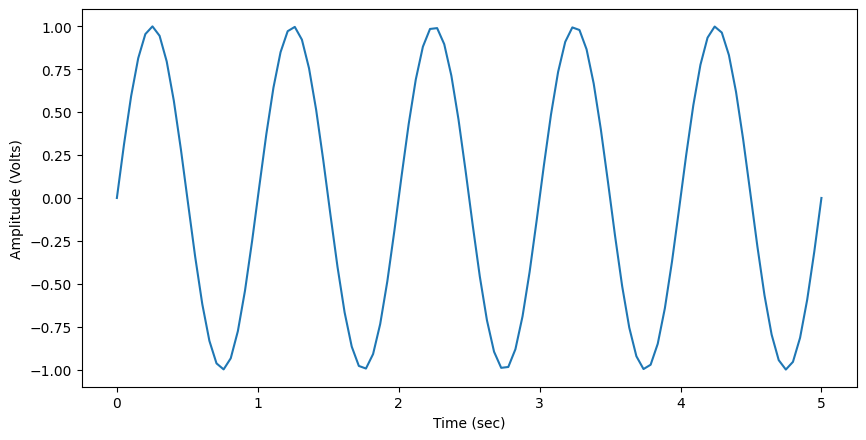

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# Generate a sine wave of frequency f = 1Hz for x-axis (time) values from 0 to 1.
# The sine wave will have 100 samples and we will get one cycle for f = 1 Hz.

f = 1 # Use 1, 2, 3, Hz frequencies and check the output.

t = np.linspace(0,5,100) # 100 is the number of samples. Use 50, 100, 300, 500 samples and check the output.

# if "t" is a numpy array the output "v" will also be a numpy array
v = np.sin(2*np.pi*f*t)

# Determine size of image before plotting width=10, height=5, and dots per inch (dpi) resolution to 100
plt.figure(figsize=(10, 5), dpi=100) 

# plot function to plot, x-axis variable "t" comes first and y-axis variable "v" comes afterwards 
plt.plot(t,v)

# For x-axis and y-axis labels 
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude (Volts)")



Text(0, 0.5, 'Amplitude (Volts)')

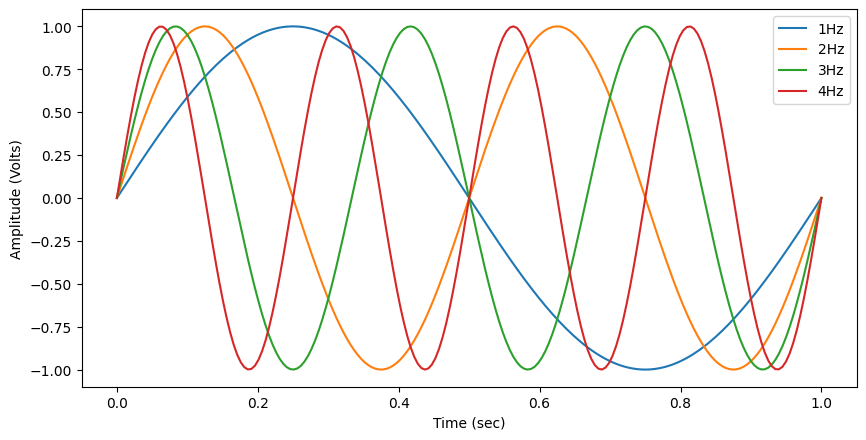

In [14]:
# plot sine waves with frequencies of multiples of 1Hz
t=np.linspace(0,1,200)


multiples = 4 # Select multiples = 1, 2, 3, 4 and check the output

plt.figure(figsize=(10, 5), dpi=100)

for k in range(1,multiples+1):
    f=k
    v = np.sin(2*np.pi*f*t)
    plt.plot(t,v,label=str(f)+'Hz') # label is used to assign a legend to a signal

# To display the legend, used in the end to display all
plt.legend()

plt.xlabel("Time (sec)")
plt.ylabel("Amplitude (Volts)")

Text(0, 0.5, 'Amplitude (Volts)')

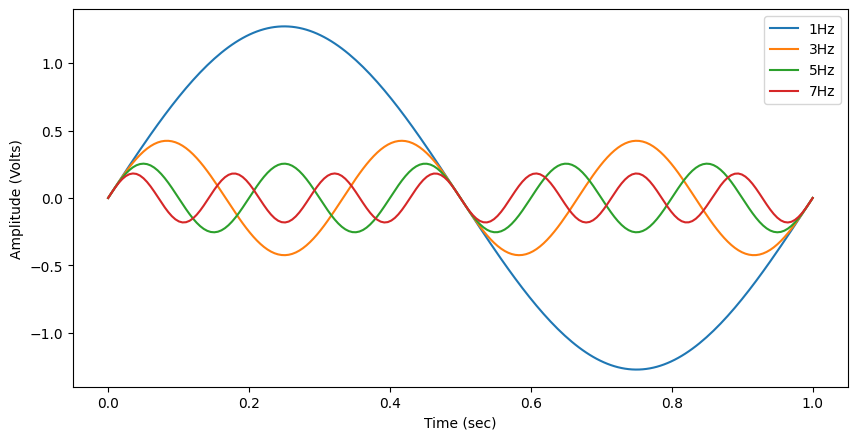

In [5]:
# plot sine waves with frequencies of odd multiples of 1Hz and decreasing amplitude

t=np.linspace(0,1,200)

# check odd_multiples: Select 3, 4, 5 and 6 and then check the output
multiples = 4

plt.figure(figsize=(10, 5), dpi=100)

for k in range(1,multiples+1):
    f=2*k-1                     # computes odd multiples
    magnitude = (4/np.pi)*(1/f) # change magnitude of each odd multiple
    
    v = magnitude*np.sin(2*np.pi*f*t)
    plt.plot(t,v,label=str(f)+'Hz')
    
plt.legend()
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude (Volts)")

Text(0, 0.5, 'Amplitude (Volts)')

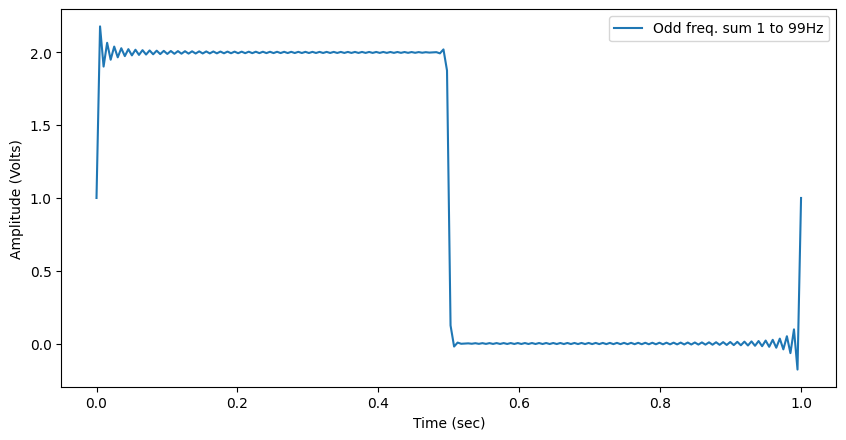

In [15]:
# Let's add above odd multiples to see the resulting waveform
square=1
t=np.linspace(0,1,200)

# check a number of odd multiples of up to 1, 2, 3, 10, 50, 100, 200 
no_of_multiples = 50

for k in range(1,no_of_multiples+1):
    f=2*k-1
    magnitude = (4/np.pi)*(1/f)
    v = magnitude*np.sin(2*np.pi*f*t)
    square = square +v
    
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(t,square,label="Odd freq. sum 1 to "+str(f)+"Hz")
plt.legend()
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude (Volts)")

## Adding sine waves makes a square wave
Adding different sine waves with odd multiples of 1Hz, produces a square wave of 1Hz. Notice, the sine waves must be added with a particular amplitude value to get a perfect square wave. The square wave becomes almost perfect with addition of 200 odd multiples of 1Hz sine wave. The following plots the sine wave frequencies on the x-axis to show, which different frequencies and their correponsing amplitudes make a square wave.

Text(0, 0.5, 'Magnitude (Volts)')

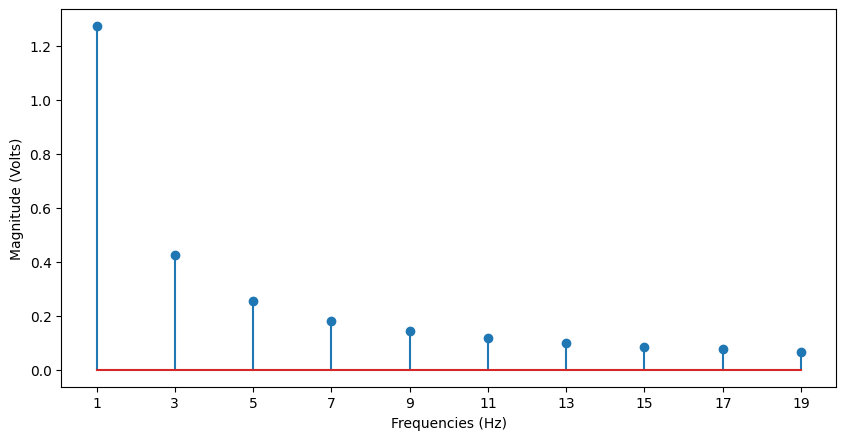

In [7]:
# Plot sine wave frequencies on the x-axis and their magnitudes (amplitudes) on the y-axis
square=1

t=np.linspace(0,1,200)


freq=[]
magn=[]
# check number of odd multiples 1, 2, 3, 10, 50, 100, 200 


odd_multiples = 10

for k in range(1,odd_multiples+1):
    f=2*k-1
    magnitude = (4/np.pi)*(1/f)
    v = magnitude*np.sin(2*np.pi*f*t)

    square = square + v

    freq.append(f)
    magn.append(magnitude)

plt.figure(figsize=(10, 5), dpi=100)
# The stem plot draws vertical lines
plt.stem(freq, magn)
# prints exactly 1,3,5..Hz at the x-axis instead of default values
# uncomment plt.xticks below and execute again
plt.xticks(freq)

# prints x and y-axis labels
plt.xlabel("Frequencies (Hz)")
plt.ylabel("Magnitude (Volts)")


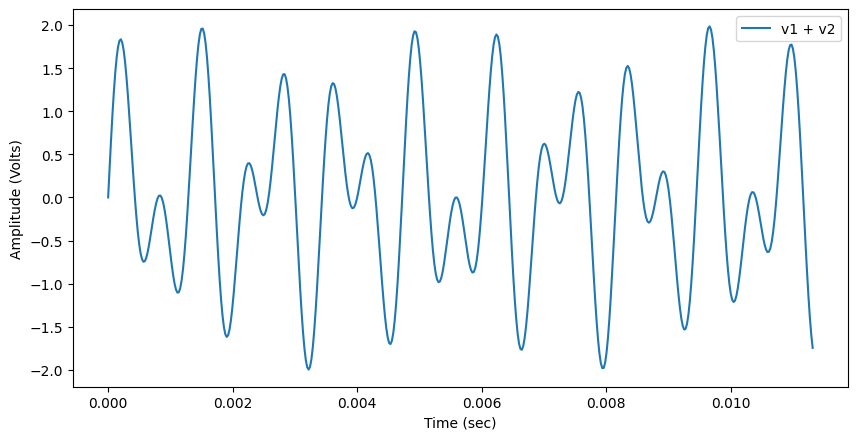

In [17]:

t=np.linspace(0,1,44100)

fv1 = 852
fh1 = 1477

v1 = np.sin(2*np.pi*fv1*t)
v2 = np.sin(2*np.pi*fh1*t)

signal = v1 + v2

# Let's display first 500 samples of the signal
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(t[:500],signal[:500],label="v1 + v2") 

plt.legend()
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude (Volts)")

from IPython.display import Audio
Audio(signal, rate=44100)  # Convert signal to audio


## Dual-Tone Multi-Frequency (DTMF) signals

DTMF signals belongs to a group of multi-frequency signals, which use two sine wave sounds. DTMF signals utilize 8 frequencies to represent 16 sounds for different digits/keys pressed over a telephone line. Seven of the eight frequencies are enough to represent the 10 digits from 0 to 9 along with * and # keys, as illustrated in Figure below:

![dtmf_pic.png](./dtmf_pic.png)

For example, the digit 5 is a sum of two sine waves of frequencies 770Hz and 1336Hz. In this part, we will generate sine waves and add them to generate DTMF signals for digits 1 and 2. We will then multiply each of these signals with the "signal" in the previous section (which also represents a DTMF digit) and sum the resulting values. The higher the value of this sum of products computation, the greater the similarity between the two multiplied signals. We can use this technique to determine a digit in an unknown DTMF signal. The following section demonstrates the procedure.  

In [9]:
# DTMF signals for digits 1 and 2

fv1 = 697   # Frequency. See figure above showing the dial pad 
fh1 = 1209  # Frequency. See figure above showing the dial pad
fh2 = 1336  # Frequency. See figure above showing the dial pad

sin_fv1 = np.sin(2*np.pi*fv1*t)
sin_fh1 = np.sin(2*np.pi*fh1*t)
sin_fh2 = np.sin(2*np.pi*fh2*t)

dtmf_digit1 = sin_fv1 + sin_fh1 # DTMF signal for digit 1
dtmf_digit2 = sin_fv1 + sin_fh2 # DTMF signal for digit 2


dtmf_digit_signals = [dtmf_digit1, dtmf_digit2]
value = [] 

# Multiply the dtmf digit 1 and 2 signals, each with the previous signal separately and sum the result

for digit_signal in dtmf_digit_signals:
    out = np.sum(signal*digit_signal)
    value.append(out)


# Find the maximum sum of the two
print(value)
print('Maximum value = ',max(value))

#Find the index of the maximum sum, which belongs to the first signal corresponding to digit 1
max_index = value.index(max(value))
print('Index of Maximum value = ',max_index)
print('The signal has the maximum similarity to digit 1.')


[44098.99999999999, 22049.499999999996]
Maximum value =  44098.99999999999
Index of Maximum value =  0
The signal has the maximum similarity to digit 1.


## Loading an audio file
Load an audio file from disk containing the DTMF tone of a digit. Plot the signal and listen to the audio file


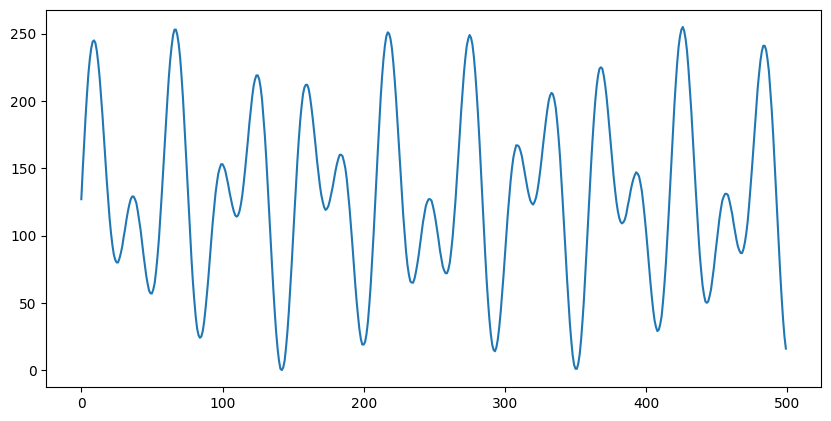

In [10]:
from scipy.io.wavfile import read #import the required function from the module to read the audio file

samplerate, loaded_signal = read('dtmf_signal.wav')

# The signal amplitude is from 0 to 255
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(loaded_signal[:500])


Audio(loaded_signal, rate=44100) # Listen to the audio signal 

## Find out the digit in the loaded audio signal
Generate DTMF signals for different digits and compute the similarity with the loaded signal to find the digit in the loaded audio file. The process involves computing sum of products of each DTMF signal with the loaded signal as demonstrated above. The maximum value of sum will belong to the DTMF signal which will be present in the loaded signal.

In [ ]:
# Generate sin waves of DTMF frequencies.
???

# Generate the dtmf signals for all the digits from 0 to 9
# dtmf signals
dtmf_digit0 = ?
dtmf_digit1 = ?
dtmf_digit2 = ?
dtmf_digit3 = ?
dtmf_digit4 = ?
dtmf_digit5 = ?
dtmf_digit6 = ?
dtmf_digit7 = ?
dtmf_digit8 = ?
dtmf_digit9 = ?



dtmf_digit_signals = [dtmf_digit0, dtmf_digit1, dtmf_digit2, dtmf_digit3, dtmf_digit4,dtmf_digit5, dtmf_digit6, dtmf_digit7, dtmf_digit8, dtmf_digit9,]

# Create a list 'value' containing the sums (as done in cell no. 7). Find the max value, and index of the max value.

????


# The digit in the loaded_signal is

????
